This page has two aims:

* to practice and extend [Pandas indexing]({{ site.baseurl
  }}/chapters/07/pandas_indexing);
* to extend the idea of permutation to data in categories;

We also ask the question - is politics noble?


In [1]:
# Our usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Our data is from this book:

> Samuel P. Oliner and Pearl M. Oliner (1992) "The Altruistic Personality:
> Rescuers of Jews in Nazi Europe". Free Press, New York. ISBN 0-02923829-3.

See [the dataset page](https://github.com/matthew-brett/datasets/oliner1988)
for some more details.

Oliner and Oliner were interested to see if they could identify distinctive
traits of people who rescued Jews in Nazi Europe.  In order to do that, they
collected structured interviews with 231 people for whom there was strong
documentary evidence that they had sheltered Jews, despite considerable risk to
themselves. These are the "rescuer" group in the table below.  They also found
126 controls with roughly similar background, nationality, age and education.
Of these, 53 claimed to have either sheltered Jews, or to have been active in
the resistance.  These are the "actives" group in the table.  This leaves 73
controls who were not active, and the authors termed these "bystanders".

The table below has data from table 6.8 of their book, where they break down the groups according to the answer they gave to the question "Did you belong to a political party before the war?".

As usual, if you are running on your own computers, download the file
[oliner_tab6_8a_1.csv]({{ site.baseurl }}/data/oliner_tab6_8a_1.csv) to the same directory as this notebook.

In [2]:
# Load the table
party_tab = pd.read_csv('oliner_tab6_8a_1.csv')
party_tab

,party_yn,rescuers,actives,bystanders
0,Yes,44,6,7
1,No,165,44,64
2,out of,209,50,71


## Setting the index

We have already seen [Pandas indexing]({{ site.baseurl
}}/chapters/07/pandas_indexing).   We are going to be selecting data out of this table with indexing, and we would like to make the index (row labels) be as informative as possible.  The current index, which Pandas created automatically, is sequential numbers, which are not memorable or informative.

In [3]:
party_tab.index

RangeIndex(start=0, stop=3, step=1)

Row labels need not be numbers.  They can also be strings.  Strings are often more useful in identifying the data in the rows.

We might prefer to use the values in the first column - `party_yn` as the labels for the rows.

We can do this with the data frame `set_index` method.  It replaces the current index (the sequential numbers) with the data from a column.

In [4]:
# Replace the numerical index with the party_yn labels.
party_tab = party_tab.set_index('party_yn')
party_tab

,rescuers,actives,bystanders
party_yn,,,
Yes,44,6,7
No,165,44,64
out of,209,50,71


Notice that Pandas took the `party_yn` column out of the data frame and used it to replace the index.

This makes it easier to use the `.loc` attribute to select data, using row labels.  For example, we can select individual elements like this:

In [5]:
# How many rescuers were there, in total?
party_tab.loc['out of', 'rescuers']

209

## The question

Looking at the data in the table, it seems as if the Rescuers had a stronger
tendency to belong to a political party than, say, the Bystanders.

To get more specific, we look at the proportion of rescuers and bystanders that answered Yes (to being a member of a political party before the war).

The `out of` row has the total number of people in each column.

In [6]:
# Proportion of Yes for Rescuers.
party_tab.loc['Yes', 'rescuers'] / party_tab.loc['out of', 'rescuers']

0.21052631578947367

In [7]:
# Proportion of Yes for Bystanders.
party_tab.loc['Yes', 'bystanders'] / party_tab.loc['out of', 'bystanders']

0.09859154929577464

That looks like a substantial difference - but could it have come about by chance?

What do we mean by chance here?

We imagine an ideal world where rescuers and bystanders have exactly the same tendency to belong to a political party.

We will take random samples from this world, to see if the random samples look anything like the numbers we see in the actual data.  If they do, then we might not be very interested in the difference in proportion, in the actual data, because it could plausibly have come about from a world where there was no difference in tendency to belong to political parties.

So, how do we take samples from this ideal world?

We will take the same number of fake rescuers as there are real rescuers, and the same number of fake bystanders as there are real bystanders.

We will assume that the same number of people overall are members of a political party:

In [8]:
# Number of people who belonged to a political party.
n_yes = party_tab.loc['Yes', 'rescuers'] + party_tab.loc['Yes', 'bystanders']
n_yes

51

This leaves the rest, who were not a member of a political party:

In [9]:
# Number of people who did not belong to a political party.
n_no = party_tab.loc['No', 'rescuers'] + party_tab.loc['No', 'bystanders']
n_no

229

This is a total of:

In [10]:
n_yes + n_no

280

We therefore have 280 labels (51 Yes labels and 229 No labels) to assign to our
280 people (209 rescuers and 71 bystanders).

In our ideal world, this assignment is random.   We can shuffle up the labels
(Yes, No), and assign each person (rescuer, bystander) a shuffled (therefore,
random) label.  We take this fake pairing, and calculate the numbers in each of
the four categories, to create a fake table, that is a random version of the
actual table.  If we do that many times, we can get an idea of how the numbers
vary in the fake tables, and therefore, what randomness looks like, in this
ideal world, of no association between rescuer / bystander and Yes / No.

## Cleaning up the table

We start by selecting the data we need from the original table.

First we use `loc` indexing to specify that we want:

* The rows labeled "Yes" and "No";
* The columns labeled "rescuers" and "bystanders".

In [11]:
bystander_tab = party_tab.loc[['Yes', 'No'], ['rescuers', 'bystanders']]
bystander_tab

,rescuers,bystanders
party_yn,,
Yes,44,7
No,165,64


Notice the *lists* `['Yes', 'No']` and `['rescuers', 'bystanders']` specifying
the row labels and columns labels that we want.


## Recreating the original data

The table gives the counts of people in each of the four categories.

We need to reconstruct the 290 people from these counts, so we can do our shuffling of 'Yes', 'No' labels, in order to make random assignments.

First we create a list of 290 *respondent* labels, of which the first 209 are
'rescuer' and the final 71 are 'bystander'.  These identify the type of respondent.

To do this, we use `np.repeat`.  Check the function signature with `np.repeat?` and Enter in a new cell.


In [12]:
# Make the 290 respondent labels.
respondent = np.repeat(['rescuer', 'bystander'], [209, 71])
# Show the first 10.
print('First 10:', respondent[:10])
# Show the last 10.
print('Last 10:', respondent[-10:])

First 10: ['rescuer' 'rescuer' 'rescuer' 'rescuer' 'rescuer' 'rescuer' 'rescuer'
 'rescuer' 'rescuer' 'rescuer']
Last 10: ['bystander' 'bystander' 'bystander' 'bystander' 'bystander' 'bystander'
 'bystander' 'bystander' 'bystander' 'bystander']


Here we typed ("hard-coded") the numbers 290, 71.  We can also get these numbers using the sum of the values in the columns of our table:

In [13]:
bystander_tab.sum()

rescuers      209
bystanders     71
dtype: int64

Our code above is a little clearer as:

In [14]:
# Make the 290 respondent labels.
respondent = np.repeat(['rescuer', 'bystander'], bystander_tab.sum())
# Show the first 10.
print('First 10:', respondent[:10])
# Show the last 10.
print('Last 10:', respondent[-10:])

First 10: ['rescuer' 'rescuer' 'rescuer' 'rescuer' 'rescuer' 'rescuer' 'rescuer'
 'rescuer' 'rescuer' 'rescuer']
Last 10: ['bystander' 'bystander' 'bystander' 'bystander' 'bystander' 'bystander'
 'bystander' 'bystander' 'bystander' 'bystander']


Now to create the 'Yes', 'No' labels.   Again, we could do this:

In [15]:
# Make the 290 Yes No labels.
party_yn = np.repeat(['Yes', 'No'], [51, 229])
# Show the first 10.
print('First 10:', party_yn[:10])
# Show the last 10.
print('Last 10:', party_yn[-10:])

First 10: ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
Last 10: ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


We would like to use `sum` again to get those totals automatically, but we have already seen that `sum`, by default, works down the columns.

Luckily Pandas has a method called `transpose` that flips the rows and columns of a data frame, like this:

In [16]:
flipped_tab = bystander_tab.transpose()
flipped_tab

party_yn,Yes,No
rescuers,44,165
bystanders,7,64


We can get the sum of Yes and No with:

In [17]:
flipped_tab.sum()

party_yn
Yes     51
No     229
dtype: int64

Or, all in one go:

In [18]:
bystander_tab.transpose().sum()

party_yn
Yes     51
No     229
dtype: int64

This allows us to do:

In [19]:
# Make the 290 Yes No labels.
party_yn = np.repeat(['Yes', 'No'], bystander_tab.transpose().sum())
# Show the first 10.
print('First 10:', party_yn[:10])
# Show the last 10.
print('Last 10:', party_yn[-10:])

First 10: ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
Last 10: ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


Next we shuffle the Yes, No labels randomly:


In [20]:
np.random.shuffle(party_yn)
party_yn[:10]

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No'],
      dtype='<U3')

We can look at the new random pairing by putting the rows into a table, with 290 rows, one for each person:

In [21]:
fake_data = pd.DataFrame()
fake_data['party_yn'] = party_yn
fake_data['respondent'] = respondent
fake_data.head()

,party_yn,respondent
0,No,rescuer
1,Yes,rescuer
2,No,rescuer
3,Yes,rescuer
4,Yes,rescuer


We now need the counts of people in each category.  That is we need counts for:

* 'No' paired with 'bystander'
* 'Yes' paired with 'bystander'
* 'No' paired with 'rescuer'
* 'Yes' paired with 'rescuer'

We could do this this the long way round, with lines like:

In [22]:
# Just the Nos.
fake_nos = fake_data[fake_data['party_yn'] == 'No']
# From the Nos, just the Bystanders.
fake_nos_bystanders = fake_nos[fake_nos['respondent'] == 'bystander']
# How many rows?
len(fake_nos_bystanders)

53

Luckily, Pandas has a `crosstab` function that does this work for us:

In [23]:
fake_tab = pd.crosstab(party_yn, respondent)
fake_tab

col_0,bystander,rescuer
row_0,,
No,53,176
Yes,18,33


We saw in the original data that the Bystanders seemed to have a lesser tendency to belong to a political party.  Let us restrict our attention to the count of "Yes" and "bystander" for now.

That count, in our original data, was:

In [24]:
actual_y_by = bystander_tab.loc['Yes', 'bystanders']
actual_y_by

7

The equivalent count in our new fake table is:

In [25]:
fake_y_by = fake_tab.loc['Yes', 'bystander']
fake_y_by

18

We need more random samples to see if the fake value is often as small as the real value.  If so, then the ideal world, where the association between rescuer / bystander and Yes / No is random, is a reasonable explanation of what we see, and we might not want to investigate these data much further.

Unfortunately, `pd.crosstab` is horribly slow, so we need to drop our usual number of iterations to 1000 to keep the run-time down.

In [26]:
counts = np.zeros(1000)
for i in np.arange(1000):
    np.random.shuffle(party_yn)
    fake_tab = pd.crosstab(party_yn, respondent)
    counts[i] = fake_tab.loc['Yes', 'bystander']
counts[:10]

array([19., 12., 16., 10., 15., 12., 17., 12., 13., 12.])

Here is our *sampling distribution* from sampling in the ideal world:

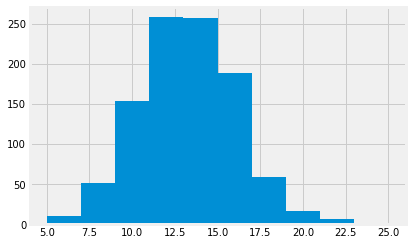

In [27]:
plt.hist(counts);

How unusual is the actual value, in this ideal world?

In [28]:
# Proportion of times we see ideal world sample >= actual value.
p_lte = np.count_nonzero(counts <= actual_y_by) / len(counts)
p_lte

0.025

## A question

Now look at this.  Here I do the same test, but I am looking at the both of these counts:

* "No", "bystander".
* "Yes", "rescuer".

In [29]:
# Yes, bystander
counts_y_by = np.zeros(1000)
# No, rescuer
counts_n_r = np.zeros(1000)
for i in np.arange(1000):
    np.random.shuffle(party_yn)
    fake_tab = pd.crosstab(party_yn, respondent)
    counts_y_by[i] = fake_tab.loc['Yes', 'bystander']
    counts_n_r[i] = fake_tab.loc['No', 'rescuer']

The test for "Yes", "bystander":

In [30]:
# Proportion of times we see ideal world sample >= actual value.
actual_y_by = bystander_tab.loc['Yes', 'bystanders']
p_lte_y_by = np.count_nonzero(counts_y_by <= actual_y_by) / len(counts)
p_lte_y_by

0.027

The test for "No", "rescuer":

In [31]:
# Proportion of times we see ideal world sample >= actual value.
actual_n_r = bystander_tab.loc['No', 'rescuers']
p_lte_n_r = np.count_nonzero(counts_n_r <= actual_n_r) / len(counts)
p_lte_n_r

0.027

See if you can work out why these two answers are *exactly* the same.